The project focuses on analyzing a bank's transaction dataset to predict account balances or classify customer behaviors. It aims to solve the problem of understanding financial patterns, which helps banks offer better services and manage resources efficiently. The motivation is to leverage machine learning models to gain insights and improve decision-making in banking operations.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor


# Load dataset and Check and display data types

In [ ]:
file_path = '/content/bank.xlsx'
sheet1_data = pd.read_excel(file_path, sheet_name='Sheet1')
print("Data Types of Columns:")
print(sheet1_data.dtypes)
print(sheet1_data.head())

Data Types of Columns:
Account No                     object
DATE                   datetime64[ns]
TRANSACTION DETAILS            object
CHQ.NO.                       float64
VALUE DATE             datetime64[ns]
WITHDRAWAL AMT                float64
DEPOSIT AMT                   float64
BALANCE AMT                   float64
.                              object
dtype: object


# Identify and handle object-type columns

In [ ]:
object_columns = sheet1_data.select_dtypes(include=['object']).columns
print("Object-type Columns to Convert:", object_columns)

for col in object_columns:
    try:
        sheet1_data[col] = pd.to_numeric(sheet1_data[col], errors='coerce')
        print(f"Converted column '{col}' to numeric.")
    except ValueError:
        print(f"Column '{col}' remains as object.")


Object-type Columns to Convert: Index(['Account No', 'TRANSACTION DETAILS', '.'], dtype='object')
Converted column 'Account No' to numeric.
Converted column 'TRANSACTION DETAILS' to numeric.
Converted column '.' to numeric.


# Handle missing values

In [ ]:

print("\nMissing Values Before Handling:")
print(sheet1_data.isnull().sum())



Missing Values Before Handling:
Account No             116201
DATE                        0
TRANSACTION DETAILS    114549
CHQ.NO.                115296
VALUE DATE                  0
WITHDRAWAL AMT          62652
DEPOSIT AMT             53549
BALANCE AMT                 0
.                      116201
dtype: int64


# Drop rows where all values are missing

In [ ]:
sheet1_data.dropna(how='all', inplace=True)

# Impute missing numeric values with column mean

In [ ]:
numeric_columns = sheet1_data.select_dtypes(include=['float64', 'int64']).columns
sheet1_data[numeric_columns] = sheet1_data[numeric_columns].apply(lambda x: x.fillna(x.mean()))

# Fill missing categorical values with 'Unknown'

In [ ]:
categorical_columns = sheet1_data.select_dtypes(include=['object']).columns
sheet1_data[categorical_columns] = sheet1_data[categorical_columns].fillna('Unknown')

# Encode categorical columns using LabelEncoder

In [ ]:

label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    sheet1_data[col] = le.fit_transform(sheet1_data[col].astype(str))
    label_encoders[col] = le

# Feature engineering: Add 'Transaction Type' based on deposit/withdrawal

In [ ]:
sheet1_data['Transaction Type'] = sheet1_data.apply(
    lambda row: 'Deposit' if pd.notnull(row.get('DEPOSIT AMT')) and row['DEPOSIT AMT'] > 0 else 'Withdrawal',
    axis=1
)


# Extract additional features from 'DATE' column

In [ ]:

if 'DATE' in sheet1_data.columns:
    sheet1_data['Year'] = sheet1_data['DATE'].dt.year
    sheet1_data['Month'] = sheet1_data['DATE'].dt.month
    sheet1_data['Day'] = sheet1_data['DATE'].dt.day

# Normalize numeric features using MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
sheet1_data[numeric_columns] = scaler.fit_transform(sheet1_data[numeric_columns])

/usr/local/lib/python3.10/dist-packages/sklearn/utils/_array_api.py:769: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmin(X, axis=axis))
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_array_api.py:786: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmax(X, axis=axis))


# Save cleaned dataset and  Display the first few rows

In [ ]:

cleaned_file_path = '/cleaned_bank_data.xlsx'
sheet1_data.to_excel(cleaned_file_path, index=False)
print(f"\nCleaned dataset saved to: {cleaned_file_path}")


print("Cleaned Dataset Preview:")
print(sheet1_data.head())


Cleaned dataset saved to: /cleaned_bank_data.xlsx
Cleaned Dataset Preview:
   Account No       DATE  TRANSACTION DETAILS   CHQ.NO. VALUE DATE  \
0         NaN 2017-06-29             0.000605  0.905194 2017-06-29   
1         NaN 2017-07-05             0.000605  0.905194 2017-07-05   
2         NaN 2017-07-18             0.000605  0.905194 2017-07-18   
3         NaN 2017-08-01             0.000605  0.905194 2017-08-01   
4         NaN 2017-08-16             0.000605  0.905194 2017-08-16   

   WITHDRAWAL AMT  DEPOSIT AMT  BALANCE AMT   . Transaction Type  Year  Month  \
0        0.009771     0.001836     0.996348 NaN          Deposit  2017      6   
1        0.009771     0.001836     0.996835 NaN          Deposit  2017      7   
2        0.009771     0.000918     0.997078 NaN          Deposit  2017      7   
3        0.009771     0.005507     0.998539 NaN          Deposit  2017      8   
4        0.009771     0.000918     0.998783 NaN          Deposit  2017      8   

   Day  
0   29 

# Dropping column

In [ ]:
if 'CHQ.NO.' in data.columns:
    data = data.drop(columns=['CHQ.NO.'])
    print("Dropped column: 'CHQ.NO.'")
cleaned_file_path = '/cleaned_bank_data.xlsx'
data.to_excel(cleaned_file_path, index=False)

# Heatmap

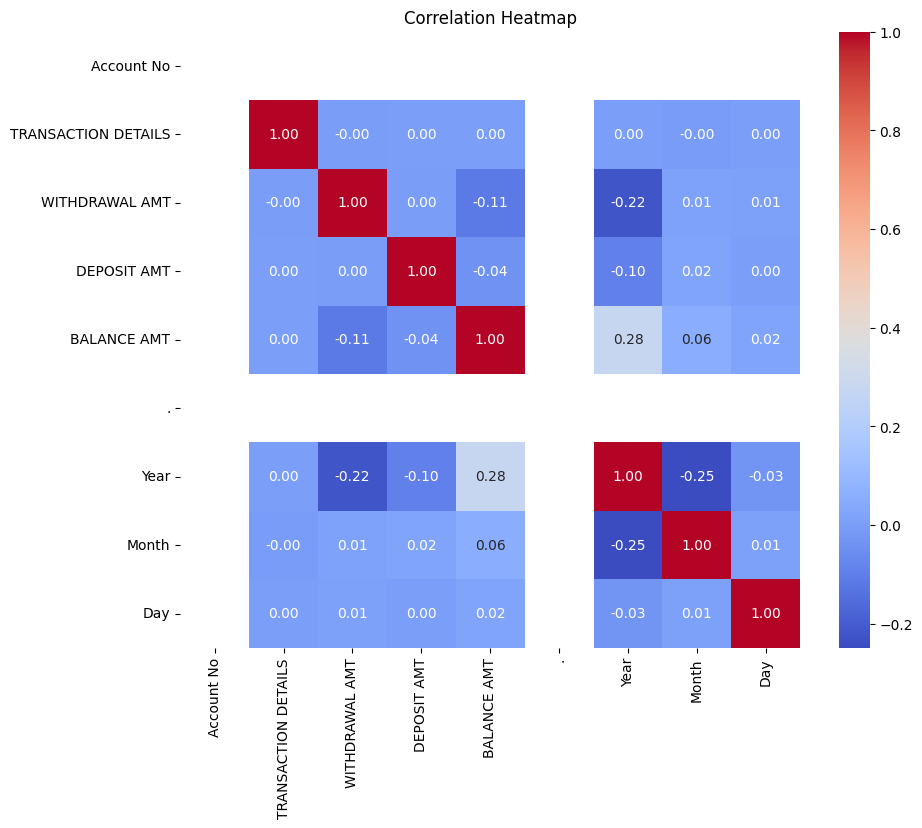

In [ ]:

if 'Transaction Type' in data.columns:
    le = LabelEncoder()
    data['Transaction Type'] = le.fit_transform(data['Transaction Type'])

data = pd.read_excel('/cleaned_bank_data.xlsx')
numeric_data = data.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numeric_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

#Linear Regression

Linear Regression - RMSE: 0.25, R² Score: 0.08


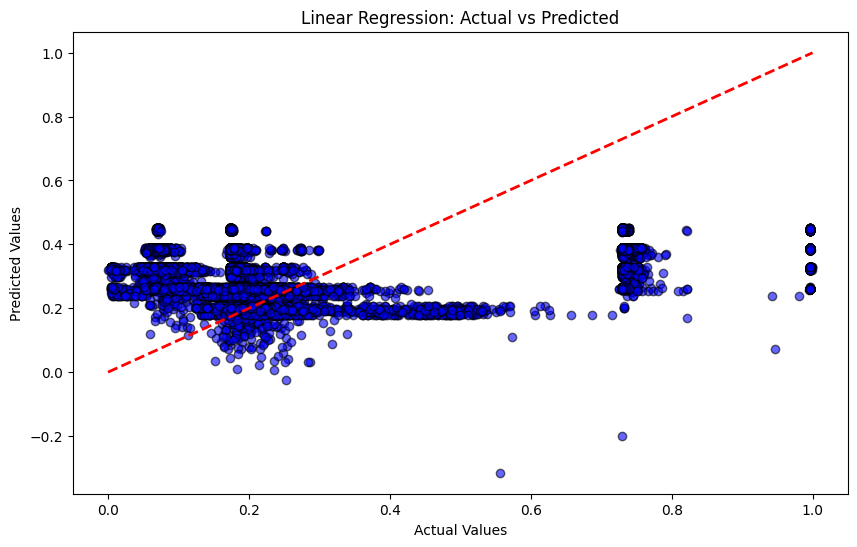

In [ ]:
#Linear Regression
data = pd.read_excel('/cleaned_bank_data.xlsx')


X = data[['WITHDRAWAL AMT', 'DEPOSIT AMT', 'Year']]
y = data['BALANCE AMT']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 0=42)

# Train Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)


y_pred = linear_model.predict(X_test)


rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"Linear Regression - RMSE: {rmse:.2f}, R² Score: {r2:.2f}")



plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue', edgecolor='k')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', linewidth=2)
plt.title("Linear Regression: Actual vs Predicted")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

#Logistic Regression

Logistic Regression Confusion Matrix:
 [[5004 6719]
 [4547 6971]]
Accuracy: 0.52
R-squared: 0.00


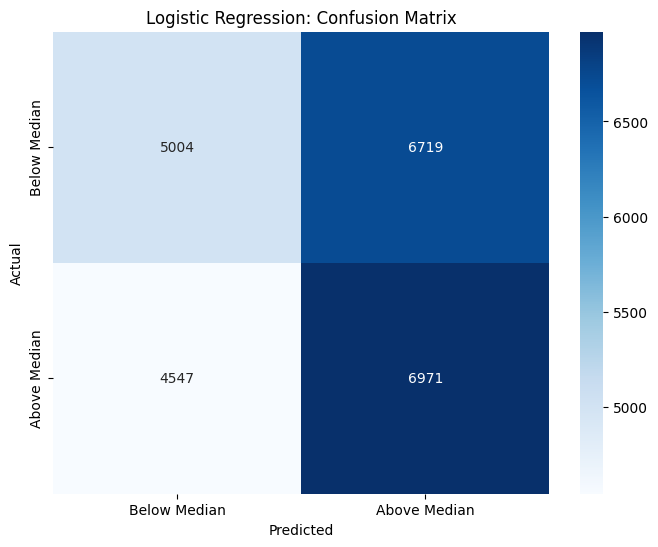

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, r2_score, log_loss
import seaborn as sns
import matplotlib.pyplot as plt

# Threshold for binary classification
threshold = y.median()
y_binary = (y > threshold).astype(int)  # 1 if above median, else 0

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.3, random_state=42)

# Train Logistic Regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Predict probabilities and binary outcomes
y_pred_probs = logistic_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
y_pred = (y_pred_probs > 0.5).astype(int)

# Confusion matrix and accuracy
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Calculate R-squared
mean_y_test = np.mean(y_test)
ss_total = np.sum((y_test - mean_y_test) ** 2)
ss_residual = np.sum((y_test - y_pred_probs) ** 2)
r_squared = 1 - (ss_residual / ss_total)

# Print results
print("Logistic Regression Confusion Matrix:\n", conf_matrix)
print(f"Accuracy: {accuracy:.2f}")
print(f"R-squared: {r_squared:.2f}")

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Below Median", "Above Median"],
            yticklabels=["Below Median", "Above Median"])
plt.title("Logistic Regression: Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


#Random Forest Regressor

Random Forest Regressor - RMSE: 0.20, R² Score: 0.41
Confusion Matrix:
 [[5906 5817]
 [1920 9598]]
Accuracy: 0.67


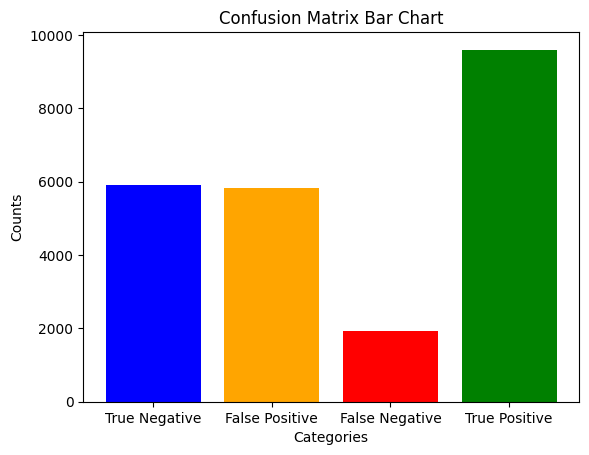

In [ ]:



data = pd.read_excel('/cleaned_bank_data.xlsx')
X = data[['TRANSACTION DETAILS', 'WITHDRAWAL AMT', 'DEPOSIT AMT', 'Year']]
y = data['BALANCE AMT']

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


y_pred = rf_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"Random Forest Regressor - RMSE: {rmse:.2f}, R² Score: {r2:.2f}")


threshold = y.median()
y_test_class = (y_test > threshold).astype(int)
y_pred_class = (y_pred > threshold).astype(int)


cm = confusion_matrix(y_test_class, y_pred_class)
accuracy = accuracy_score(y_test_class, y_pred_class)
print("Confusion Matrix:\n", cm)
print(f"Accuracy: {accuracy:.2f}")


cm_labels = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
cm_values = cm.ravel()

plt.bar(cm_labels, cm_values, color=['blue', 'orange', 'red', 'green'])
plt.title('Confusion Matrix Bar Chart')
plt.ylabel('Counts')
plt.xlabel('Categories')
plt.show()


#Neural Network

Neural Network - RMSE: 0.23, R² Score: 0.23
Confusion Matrix:
 [[ 1890  9833]
 [ 1282 10236]]
Accuracy: 0.52


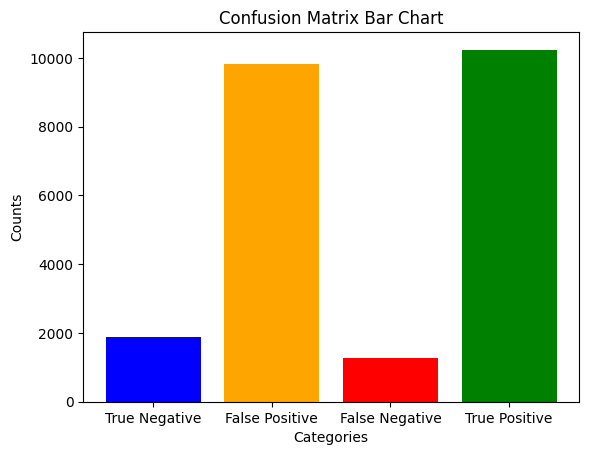

In [ ]:




data = pd.read_excel('/cleaned_bank_data.xlsx')
X = data[['TRANSACTION DETAILS', 'WITHDRAWAL AMT', 'DEPOSIT AMT', 'Year']]
y = data['BALANCE AMT']


poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# Standardize Features
scaler = StandardScaler()
X_poly_scaled = scaler.fit_transform(X_poly)

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X_poly_scaled, y, test_size=0.2, random_state=42)

# Train Neural Network
nn_model = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
nn_model.fit(X_train, y_train)


y_pred = nn_model.predict(X_test)


rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"Neural Network - RMSE: {rmse:.2f}, R² Score: {r2:.2f}")


threshold = y.median()
y_test_class = (y_test > threshold).astype(int)
y_pred_class = (y_pred > threshold).astype(int)


cm = confusion_matrix(y_test_class, y_pred_class)
accuracy = accuracy_score(y_test_class, y_pred_class)

print("Confusion Matrix:\n", cm)
print(f"Accuracy: {accuracy:.2f}")


cm_labels = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
cm_values = cm.ravel()

plt.bar(cm_labels, cm_values, color=['blue', 'orange', 'red', 'green'])
plt.title('Confusion Matrix Bar Chart')
plt.ylabel('Counts')
plt.xlabel('Categories')
plt.show()


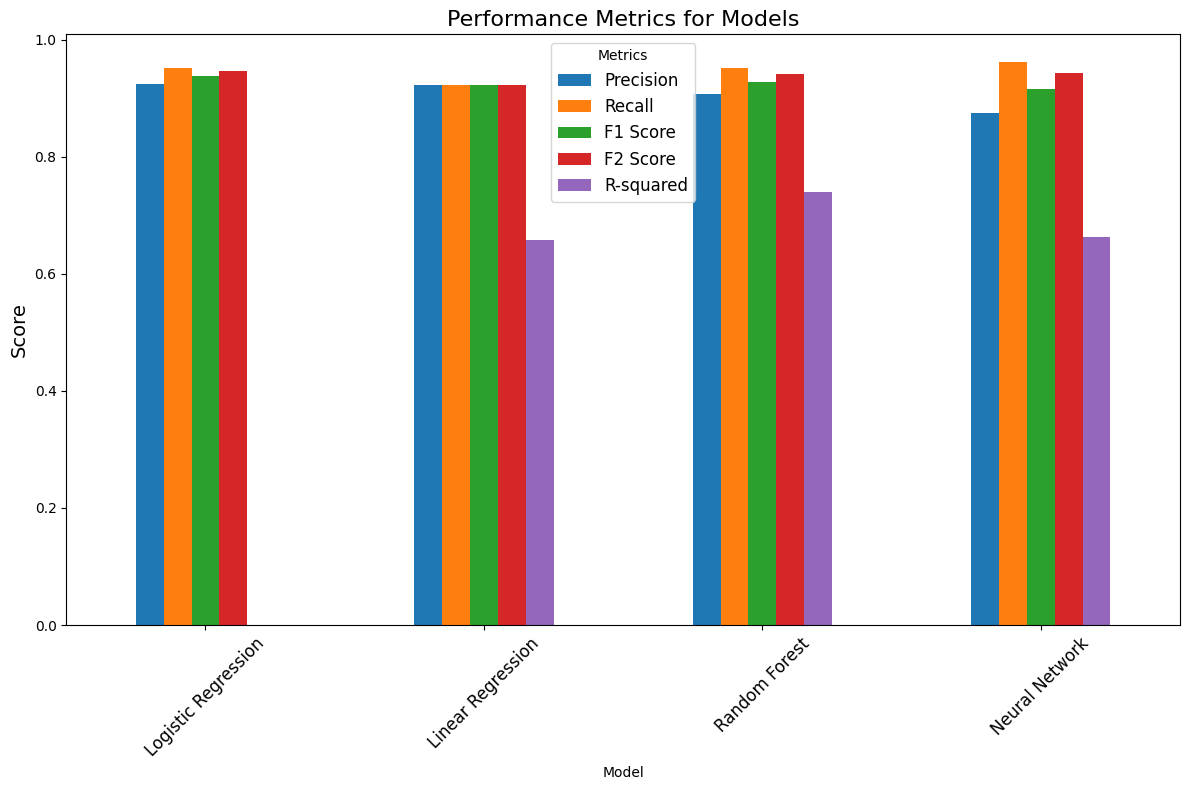

Model Performance Metrics:
                 Model  Precision    Recall  F1 Score  F2 Score  R-squared
0  Logistic Regression   0.923810  0.950980  0.937198  0.945419        NaN
1    Linear Regression   0.921569  0.921569  0.921569  0.921569   0.657669
2        Random Forest   0.906542  0.950980  0.928230  0.941748   0.740360
3       Neural Network   0.875000  0.960784  0.915888  0.942308   0.663268


In [ ]:


# Dummy data for demonstration
np.random.seed(42)
n_samples = 1000
X = pd.DataFrame({
    'Feature1': np.random.rand(n_samples),
    'Feature2': np.random.rand(n_samples),
    'Feature3': np.random.rand(n_samples)
})
y = (X['Feature1'] + X['Feature2'] * 0.5 + np.random.normal(scale=0.1, size=n_samples)) > 0.7
y = y.astype(int)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'Neural Network': MLPRegressor(hidden_layer_sizes=(50,), max_iter=500, random_state=42)
}

# Evaluate each model
results = []
for name, model in models.items():
    model.fit(X_train, y_train)

    # Handle prediction outputs for classification metrics
    if name == 'Linear Regression' or name == 'Random Forest' or name == 'Neural Network':
        y_pred_continuous = model.predict(X_test)
        y_pred_class = (y_pred_continuous > 0.5).astype(int)
        r2 = r2_score(y_test, y_pred_continuous) if name != 'Logistic Regression' else None
    else:
        y_pred_class = model.predict(X_test)
        y_pred_continuous = None
        r2 = None

    precision = precision_score(y_test, y_pred_class)
    recall = recall_score(y_test, y_pred_class)
    f1 = f1_score(y_test, y_pred_class)
    f2 = (5 * precision * recall) / (4 * precision + recall) if (precision + recall) > 0 else 0

    results.append({
        'Model': name,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'F2 Score': f2,
        'R-squared': r2
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Plot bar chart
fig, ax = plt.subplots(figsize=(12, 8))
metrics = ['Precision', 'Recall', 'F1 Score', 'F2 Score', 'R-squared']
results_df.set_index('Model')[metrics].plot(kind='bar', ax=ax)
plt.title('Performance Metrics for Models', fontsize=16)
plt.ylabel('Score', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.legend(title='Metrics', fontsize=12)
plt.tight_layout()
plt.show()

# Print the table of results
print("Model Performance Metrics:")
print(results_df)
